___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 05 & 06</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Groupby & Useful Operations</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [BASIC AGGREGATION METHODS](#1)
* [GROUPBY & AGGREGATION](#2)
    * [DataFrame.groupby()](#2.1)
* [DATAFRAME/SERIES OPERATIONS](#3)
    * [.aggregate()/agg()](#3.1)
        * [DataFrame.agg()](#3.1.1)
        * [DataFrame.groupby().agg()](#3.1.2)
    * [.filter()](#3.2)
        * [DataFrame.groupby().filter()](#3.2.1)
    * [.transform()](#3.3)
        * [DataFrame.groupby().transform()](#3.3.1)
    * [.apply()](#3.4)
        * [Series.apply() - df["col"].apply()](#3.4.1)
        * [DataFrame.apply()](#3.4.2)
    * [.applymap()](#3.5)
    * [.map()](#3.6)
        * [Series.map() - df["col"].map()](#3.6.1)
        * [DataFrame.map()](#3.6.2)
    * [df.transform() vs df.apply()](#3.7)
* [pivot() vs pivot_table()](#8)
* [.stack() & .unstack()](#9)
    * [.stack()](#9.1)
    * [.unstack()](#9.2)
* [THE END OF THE SESSION - 05 & 06](#10)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy you can import it as a library:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Basic Aggregation Methods</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

One of the most basic analysis functions is grouping and aggregating data. In some cases, this level of analysis may be sufficient to answer real-world/business questions. In other instances, this activity might be the first step in a more complex data science analysis. In pandas, the groupby function can be combined with one or more aggregation functions to quickly and easily summarize data. This concept is deceptively simple and most new pandas users will understand this concept. However, they might be surprised at how useful complex aggregation functions can be for supporting sophisticated analysis [Source](https://pbpython.com/groupby-agg.html).

An essential piece of analysis of large data is efficient summarization: computing aggregations, such as ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset. The aggregate() method allows you to apply a function or a list of function names to be executed along one of the axis of the DataFrame, default 0, which is the index (row) axis [Source](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html).

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question. Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays which are also used for Pandas Dataframes [Pandas Official Documentation](https://pandas.pydata.org/docs/reference/frame.html); we'll discuss and demonstrate some of them here:

* ``count()`` ==> Counts non-NA cells for each column or row.
* ``mean()`` ==> Returns the mean of the values over the requested axis.
* ``median()`` ==> Returns the median of the values over the requested axis.
* ``min()`` ==> Returns the minimum of the values over the requested axis.
* ``max()`` ==> Returns the maximum of the values over the requested axis.
* ``std()`` ==> Returns sample standard deviation over requested axis.
* ``var()`` ==> Returns unbiased variance over requested axis.
* ``sum()`` ==> Returns the sum of the values over the requested axis.
* ``idxmin()`` ==> Returns index of first occurrence of minimum over requested axis.
* ``idxmax()`` ==> Returns index of first occurrence of maximum over requested axis.
* ``corr()`` ==> Computes pairwise correlation of columns, excluding NA/null values.

To sum up, in this session, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a groupby.

In [44]:
df = pd.DataFrame(np.random.randint(0, 100, size=(7, 5)), 
                  columns=["x1", "x2", "x3", "x4", "x5"])
df

,x1,x2,x3,x4,x5
0,36,81,66,84,57
1,5,80,47,54,19
2,87,47,80,41,77
3,8,64,79,16,12
4,23,48,95,40,70
5,86,21,78,63,1
6,90,27,58,55,40


In [45]:
df.count()

x1    7
x2    7
x3    7
x4    7
x5    7
dtype: int64

In [46]:
df.x1.count()

7

In [47]:
df.mean()

x1    47.857143
x2    52.571429
x3    71.857143
x4    50.428571
x5    39.428571
dtype: float64

In [48]:
df.median()

x1    36.0
x2    48.0
x3    78.0
x4    54.0
x5    40.0
dtype: float64

In [49]:
df.x3.median()

78.0

In [50]:
df.min()

x1     5
x2    21
x3    47
x4    16
x5     1
dtype: int32

In [51]:
df.x4.min()

16

In [52]:
df.idxmin()
# numpy'deki argmin

x1    1
x2    5
x3    1
x4    3
x5    5
dtype: int64

In [53]:
df.idxmax()

x1    6
x2    0
x3    4
x4    0
x5    2
dtype: int64

In [54]:
df.loc[df.idxmin(),'x2']

1    80
5    21
1    80
3    64
5    21
Name: x2, dtype: int32

In [55]:
df.std()

x1    38.615319
x2    23.782747
x3    15.994047
x4    21.219937
x5    29.725730
dtype: float64

In [56]:
df[['x1', 'x2']].std()

x1    38.615319
x2    23.782747
dtype: float64

In [57]:
df.sum()

x1    335
x2    368
x3    503
x4    353
x5    276
dtype: int64

In [58]:
df.sum(axis = 1)
# sütün bazında çalıştı

0    324
1    205
2    332
3    179
4    276
5    249
6    270
dtype: int64

In [59]:
df.describe().T
# veya transpose

,count,mean,std,min,25%,50%,75%,max
x1,7.0,47.857143,38.615319,5.0,15.5,36.0,86.5,90.0
x2,7.0,52.571429,23.782747,21.0,37.0,48.0,72.0,81.0
x3,7.0,71.857143,15.994047,47.0,62.0,78.0,79.5,95.0
x4,7.0,50.428571,21.219937,16.0,40.5,54.0,59.0,84.0
x5,7.0,39.428571,29.725730,1.0,15.5,40.0,63.5,77.0


Pandas dataframe.idxmin() function returns index of first occurrence of minimum over requested axis. While finding the index of the minimum value across any index, all NA/null values are excluded.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Groupby & Aggregation</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In Exploratory Data Analysis (EDA), we often would like to analyze data by some categories. In SQL, the GROUP BY statement groups row that has the same category values into summary rows. In Pandas, SQL's GROUP BY operation is performed using the similarly named **``groupby()``** method. Pandas' groupby() allows us to split data into separate groups to perform computations for better analysis [Source](https://towardsdatascience.com/all-pandas-groupby-you-should-know-for-grouping-data-and-performing-operations-2a8ec1327b5).

In this part of the session, you'll learn the "group by" process (split-apply-combine) and how to use Pandas's groupby() function to group data and perform operations.

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby()</p>

<a id="2.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``groupby()``** method groups DataFrame using a mapper or by a Series of columns. A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups [Official Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).

In other words, the **``groupby()``** method allows you to group rows of data together and call aggregate functions.

**``DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)``**

# PearDeck
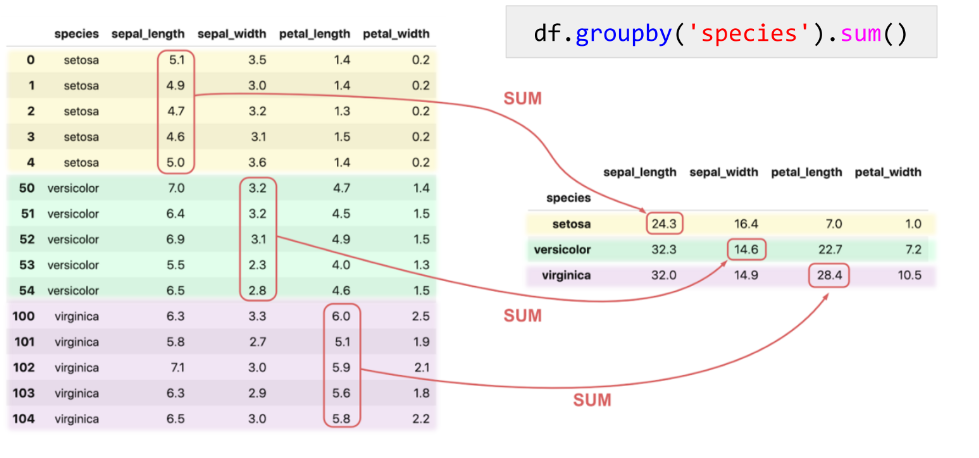


In [60]:
data = {'Company':['GOOG', 'GOOG', 'MSFT', 'MSFT', 'GOOG', 'MSFT', 'GOOG', 'MSFT'],
        'Department':['HR', 'IT', 'IT', 'HR', 'HR', 'IT', 'IT', 'HR'],
        'Person':['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah', 'Tom', 'Terry'],
        'Age':[30, 28, 35, 40, 42, 25, 32, 48],
        'Sales':[200, 120, 340, 124, 243, 350, 180, 220]}

In [62]:
df1 = pd.DataFrame(data)
df1

,Company,Department,Person,Age,Sales
0,GOOG,HR,Sam,30,200
1,GOOG,IT,Charlie,28,120
2,MSFT,IT,Amy,35,340
3,MSFT,HR,Vanessa,40,124
4,GOOG,HR,Carl,42,243
5,MSFT,IT,Sarah,25,350
6,GOOG,IT,Tom,32,180
7,MSFT,HR,Terry,48,220


In [68]:
df1.groupby('Company').mean()

,Age,Sales
Company,,
GOOG,33.0,185.75
MSFT,37.0,258.50


In [72]:
df1.groupby('Company')['Sales'].mean()
# df1.groupby('Company').Sales.mean()

Company
GOOG    185.75
MSFT    258.50
Name: Sales, dtype: float64

In [73]:
df1.groupby('Company')[['Sales']].mean()

,Sales
Company,
GOOG,185.75
MSFT,258.50


In [78]:
df1.groupby('Company')['Company'].count()
# Çalışan sayısı

Company
GOOG    4
MSFT    4
Name: Company, dtype: int64

In [79]:
df1.Company.value_counts()

GOOG    4
MSFT    4
Name: Company, dtype: int64

In [81]:
df1.groupby(['Company', 'Department']).mean()

Age  Sales
Company Department             
GOOG    HR          36.0  221.5
        IT          30.0  150.0
MSFT    HR          44.0  172.0
        IT          30.0  345.0

In [87]:
df1.groupby(['Company', 'Department']).describe()

Age                                               Sales  \
                   count  mean       std   min   25%   50%   75%   max count   
Company Department                                                             
GOOG    HR           2.0  36.0  8.485281  30.0  33.0  36.0  39.0  42.0   2.0   
        IT           2.0  30.0  2.828427  28.0  29.0  30.0  31.0  32.0   2.0   
MSFT    HR           2.0  44.0  5.656854  40.0  42.0  44.0  46.0  48.0   2.0   
        IT           2.0  30.0  7.071068  25.0  27.5  30.0  32.5  35.0   2.0   

                                                                           
                     mean        std    min     25%    50%     75%    max  
Company Department                                                         
GOOG    HR          221.5  30.405592  200.0  210.75  221.5  232.25  243.0  
        IT          150.0  42.426407  120.0  135.00  150.0  165.00  180.0  
MSFT    HR          172.0  67.882251  124.0  148.00  172.0  196.00  220.0  
        IT          345.0   7.071068  340.0  342.50  345.0  347.50  350.0

In [88]:
df1.groupby(['Company', 'Department'])[['Sales']].describe()

Sales                                                  \
                   count   mean        std    min     25%    50%     75%   
Company Department                                                         
GOOG    HR           2.0  221.5  30.405592  200.0  210.75  221.5  232.25   
        IT           2.0  150.0  42.426407  120.0  135.00  150.0  165.00   
MSFT    HR           2.0  172.0  67.882251  124.0  148.00  172.0  196.00   
        IT           2.0  345.0   7.071068  340.0  342.50  345.0  347.50   

                           
                      max  
Company Department         
GOOG    HR          243.0  
        IT          180.0  
MSFT    HR          220.0  
        IT          350.0

In [ ]:
df1.groupby('Company')

**Now you can use the ``.groupby()`` method to group rows together based on a column name. For instance, let's group based on Company. This will create a DataFrameGroupBy object:**

You can save this object as a new variable:

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Useful Operations</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- ### `.aggregate()`
- ### `.filter()`
- ### `.transform()`
- ### `.apply()`
- ### `.applymap()`
- ### `.map()`
- ### `.pivot() & .pivot_table()`
- ### `.stack() & .unstack()`

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">.aggregate() / agg()</p>

<a id="3.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

# PearDeck
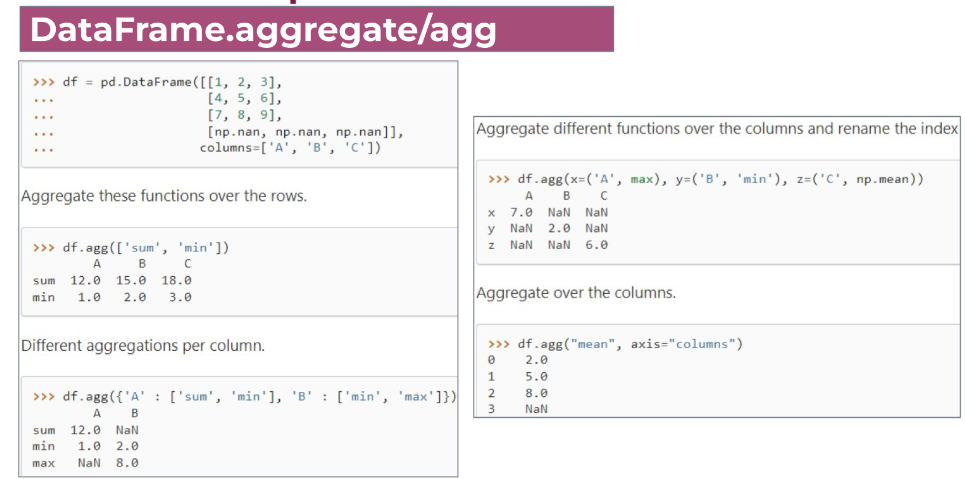
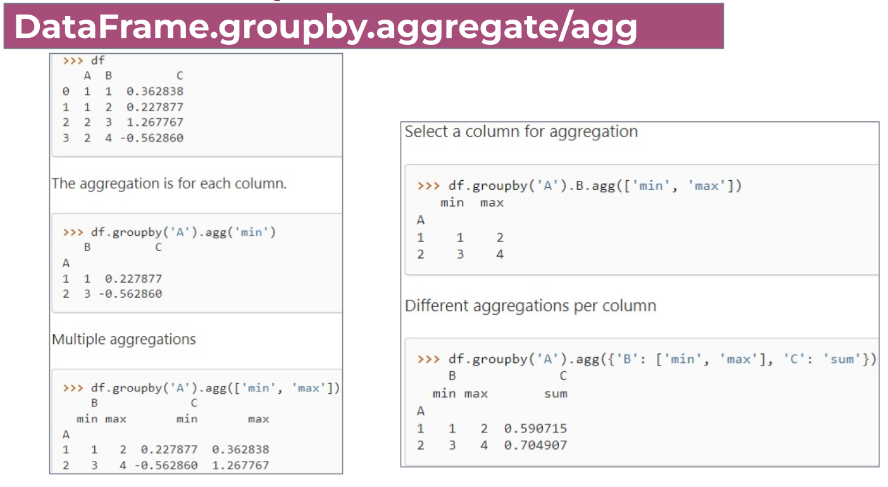

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.agg()</p>

<a id="3.1.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrame.aggregate(func=None, axis=0, *args, **kwargs)``**

Returns: scalar, Series or DataFrame

The return can be:
- scalar : when Series.agg is called with single function
- Series : when DataFrame.agg is called with a single function
- DataFrame : when DataFrame.agg is called with several functions (Returns scalar, Series or DataFrame).

The aggregation operations are always performed over an axis, either the index (default) or the column axis. This behavior is different from numpy aggregation functions (mean, median, prod, sum, std, var), where the default is to compute the aggregation of the flattened array, e.g., numpy.mean(arr_2d) as opposed to numpy.mean(arr_2d, axis=0).

**agg()** is an **alias for aggregate()**. Use the alias [Official Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html).

In [89]:
df2 = pd.DataFrame({'groups': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
                   'var1': [10, 23, 33, 22, 11, 99, 76, 84, 45],
                   'var2': [100, 253, 333, 262, 111, 969, 405, 578, 760]})
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [96]:
df2.agg([sum,min])

,groups,var1,var2
sum,ABCABCABC,403,3771
min,A,10,100


In [97]:
df2.agg({"var1" : sum,
         "var2" : np.mean})

var1    403.0
var2    419.0
dtype: float64

In [98]:
df2.agg({"var1" : [sum],
         "var2" : np.mean})

,var1,var2
sum,403.0,NaN
mean,NaN,419.0


In [99]:
df2.agg({"var1" : [sum, np.mean],
         "var2" : [min, max]})

,var1,var2
sum,403.000000,NaN
mean,44.777778,NaN
min,NaN,100.0
max,NaN,969.0


#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby().agg()</p>

<a id="3.1.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrameGroupBy.agg(arg, *args, **kwargs)``**

Aggregates using one or more operations over the specified axis [Pandas Official Documentation](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html).

[SOURCE01](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/) & [SOURCE02](https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/)

In [100]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [103]:
df2.groupby('groups').agg([min, 'median', max])

var1            var2            
        min median max  min median  max
groups                                 
A        10   22.0  76  100  262.0  405
B        11   23.0  84  111  253.0  578
C        33   45.0  99  333  760.0  969

In [104]:
df2.groupby('groups').agg({'var1' : [min, max],
                           'var2' : 'median'})

var1       var2
        min max median
groups                
A        10  76  262.0
B        11  84  253.0
C        33  99  760.0

In [105]:
df2.groupby('groups')[['var1']].agg([min, 'max'])

var1    
        min max
groups         
A        10  76
B        11  84
C        33  99

In [107]:
df2.groupby('groups')[['var1', 'var2']].agg([min, 'max'])

var1     var2     
        min max  min  max
groups                   
A        10  76  100  405
B        11  84  111  578
C        33  99  333  969

In [106]:
df2.groupby('groups')[['var1', 'var2']].agg({'var1' : min,
                                             'var2' : max})

,var1,var2
groups,,
A,10,405
B,11,578
C,33,969


### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">.filter()</p>

<a id="3.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.filter()</p>

<a id="3.2.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Pandas **``Dataframe.filter()``** is an inbuilt function that is used to subset columns or rows of DataFrame according to labels in the particular index. The DataFrame **``filter()``** returns subset the DataFrame rows or columns according to the detailed index labels. **One thing to note that** this routine does **NOT** filter a DataFrame on its contents. The filter() function is applied to the labels of the index[Pandas Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html)

[SOUREC01](https://www.sharpsightlabs.com/blog/pandas-filter/) & [SOURCE02](https://appdividend.com/2020/03/19/pandas-filter-pandas-dataframe-filter-in-python-example/)

# PearDeck
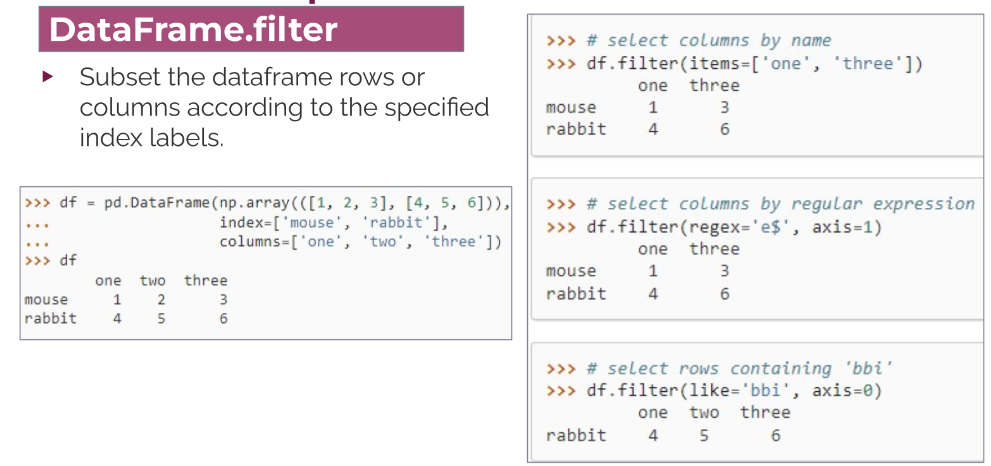
regex = 'e$' e ile bitenler demek

In [108]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [110]:
df2.filter(['groups', 'var1'])

,groups,var1
0,A,10
1,B,23
2,C,33
3,A,22
4,B,11
5,C,99
6,A,76
7,B,84
8,C,45


In [112]:
df2.filter(regex = '^var', axis = 1)

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [114]:
df2.filter(like = 'ar', axis = 1)

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [116]:
df2.filter(like = '1', axis = 0)

,groups,var1,var2
1,B,23,253


#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">DataFrame.groupby().filter()</p>

<a id="3.2.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``DataFrameGroupBy.filter(func, dropna=True, *args, **kwargs)``**
- Returns a copy of a DataFrame excluding filtered elements.
- Elements from groups are filtered if they do not satisfy the boolean criterion specified by func [Official Pandas Document](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html).

# PearDeck
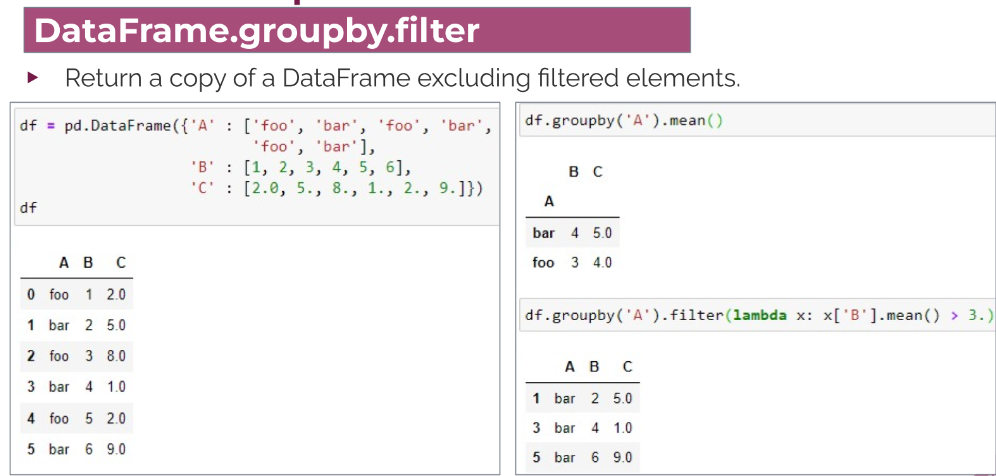

In [118]:
df2.groups.unique()

array(['A', 'B', 'C'], dtype=object)

In [119]:
df2.groupby('groups').mean()

,var1,var2
groups,,
A,36.000000,255.666667
B,39.333333,314.000000
C,59.000000,687.333333


In [122]:
df2.groupby('groups').filter(lambda x : x.var1.mean() > 39)

,groups,var1,var2
1,B,23,253
2,C,33,333
4,B,11,111
5,C,99,969
7,B,84,578
8,C,45,760


In [123]:
df2.groupby("groups").sum()

,var1,var2
groups,,
A,108,767
B,118,942
C,177,2062


In [124]:
df2.groupby("groups")[['var2']].sum()

,var2
groups,
A,767
B,942
C,2062


In [127]:
df2.groupby("groups")

In [128]:
(lambda x : x.var2.sum() < 941.9)(df2.groupby("groups"))

groups
A     True
B    False
C    False
Name: var2, dtype: bool

In [129]:
df2.groupby("groups").filter(lambda x : x.var2.sum() < 941.9)

,groups,var1,var2
0,A,10,100
3,A,22,262
6,A,76,405


## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 05 & 06</p>

<a id="10"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

________